# **Proyek Klasifikasi Konsumsi Listrik Rumah Tangga (Time Series Classification)**

## **1. Business Understanding (Pemahaman Bisnis)**

Tahap pertama dalam metodologi CRISP-DM adalah memahami konteks masalah, tujuan bisnis, dan persyaratan teknis proyek sebelum melakukan pemrosesan data.

### **1.1 Latar Belakang Masalah**

Sektor perumahan merupakan penyumbang utama konsumsi listrik dan emisi karbon nasional. Di Inggris, studi Powering the Nation menyoroti bahwa perubahan perilaku konsumen adalah kunci untuk efisiensi energi. Namun, penyedia layanan utilitas (listrik) menghadapi kendala utama:

- Kebutuhan Granularitas: Tagihan listrik bulanan tidak memberikan wawasan tentang perangkat apa yang boros energi.
- Volume Data Masif: Dengan jutaan rumah tangga yang menghasilkan data setiap 15 menit, metode analisis konvensional (seperti Deep Learning yang berat) sering kali terlalu lambat atau mahal untuk diterapkan pada skala nasional.
- Kebutuhan Solusi Cepat: Diperlukan metode yang dapat mengklasifikasikan pola konsumsi dengan cepat dan akurat untuk memberikan umpan balik real-time atau harian kepada pelanggan.

### **1.2 Tujuan Proyek (*Project Objectives*)**

Tujuan utama dari analisis ini adalah:

1. Otomatisasi Identifikasi Perangkat: Mampu mengenali 7 jenis perangkat elektronik utama (Kettle, Microwave, Mesin Cuci, dll.) secara otomatis dari data smart meter tanpa intervensi manual.
2. Skalabilitas Biaya (Cost-Effective Scalability): Mengimplementasikan solusi klasifikasi yang ringan secara komputasi sehingga dapat dijalankan pada infrastruktur server standar atau bahkan di edge device (meteran pintar) untuk jutaan pelanggan.
3. Manajemen Beban (Load Management): Mengidentifikasi penggunaan perangkat berdaya tinggi (seperti Tumble Dryer) pada jam sibuk untuk mendukung program Demand Side Response (pengalihan beban).

### **1.3 Penilaian Situasi (Assess Situation)**

- Aset Data: Dataset ElectricDevices dengan resolusi 15 menit (panjang 96 titik). Ini adalah resolusi rendah yang menantang, namun realistis untuk standar Smart Meter saat ini.
- Pemilihan Metode (ROCKET): 
  - Peluang: Anda memilih ROCKET, yang merupakan metode state-of-the-art (SOTA). Keunggulan utamanya adalah kecepatannya yang jauh lebih tinggi daripada Deep Learning (seperti CNN/LSTM) dengan akurasi yang setara atau lebih baik.
  - Implikasi Bisnis: Penggunaan ROCKET memungkinkan pemrosesan data historis bertahun-tahun dalam hitungan menit, bukan jam. Ini menurunkan biaya operasional cloud computing secara signifikan.
- Risiko: Kelas data tidak seimbang (imbalance). Perangkat yang jarang digunakan (seperti Mesin Cuci) memiliki sampel lebih sedikit dibandingkan perangkat umum (seperti Kettle), padahal perangkat jarang inilah yang seringkali memakan daya besar.

### **1.4 Tujuan Data Mining (Data Mining Goals)**

1. Klasifikasi Akurat & Cepat: Membangun model ROCKET untuk mengklasifikasikan 7 kelas perangkat dengan akurasi yang dapat diandalkan (target >70-80% pada data uji).
2. Feature Extraction: Memanfaatkan kemampuan ROCKET untuk menghasilkan ribuan fitur konvolusional acak (random kernels) yang dapat menangkap karakteristik bentuk (shape) dan frekuensi sinyal listrik 15-menit yang mungkin terlewatkan oleh metode statistik biasa.
3. Efisiensi Waktu Pelatihan: Membuktikan bahwa waktu pelatihan model (training time) secara signifikan lebih cepat dibandingkan metode baseline lain, mendukung argumen skalabilitas bisnis.

### **1.5 Kriteria Kesuksesan (Success Criteria)**

- Kriteria Bisnis: Model dapat memberikan label perangkat yang benar pada data pelanggan baru dengan kecepatan tinggi, memungkinkan penyedia listrik memberikan rekomendasi penghematan energi (misalnya: "Anda sering menggunakan mesin cuci di jam tarif mahal") secara otomatis.
- Kriteria Teknis:
  - Mencapai metrik Balanced Accuracy yang tinggi (mengingat imbalanced class).
  - Waktu inferensi (prediksi) per data pelanggan harus sangat rendah (milidetik), memvalidasi pemilihan ROCKET sebagai solusi yang tepat untuk Big Data energi.

## **2. Data Understanding (Pemahaman Data)**

Tahap ini berfokus pada pengumpulan, deskripsi, dan eksplorasi data untuk memastikan kualitas dan kesesuaiannya dengan tujuan proyek. Berikut adalah detail lengkap mengenai dataset ElectricDevices.

### **2.1 Sumber Data (Data Provenance)**

Dataset ini tidak dibuat secara sintetis di laboratorium, melainkan berasal dari dunia nyata:
- Asal Studi: Data ini merupakan turunan dari proyek penelitian besar pemerintah Inggris yang disebut "Powering the Nation" atau secara resmi dikenal sebagai Household Electricity Survey (HES).
- Penyelenggara: Studi ini didanai oleh Department for Environment, Food and Rural Affairs (DEFRA) dan Department of Energy and Climate Change (DECC) Inggris, serta dilaksanakan oleh Energy Saving Trust.
- Periode Pengambilan: Data mentah dikumpulkan antara tahun 2010 hingga 2011.

### **2.2 Metodologi Pengambilan Data (Data Acquisition)**

Cara data ini diambil sangatlah detail dan invasif (memerlukan pemasangan alat di dalam rumah), yang menjadikannya "Gold Standard" untuk perilaku konsumsi listrik:
1. Subjek Survei: Melibatkan 251 rumah tangga di seluruh Inggris.
2. Sensor: Berbeda dengan smart meter biasa yang hanya mengukur total satu rumah, studi ini memasang sensor pemantau (meteran) langsung pada setiap perangkat elektronik (seperti di colokan kulkas, di sirkuit mesin cuci, dll).
3. Resolusi Asli: Data mentah direkam dengan interval sangat tinggi, yaitu setiap 2 menit (dan sebagian 10 menit). Ini menghasilkan profil konsumsi yang sangat halus.

### **2.3 Transformasi ke Format Dataset Anda (Data Preprocessing)**

Dataset yang Anda miliki saat ini (ElectricDevices) adalah versi yang telah diproses ulang (down-sampled) dari data mentah di atas untuk simulasi kasus bisnis tertentu.
- Pembentukan Sampel (Segmentation): Data dipotong-potong menjadi jendela waktu 24 jam (siklus harian).
- Penurunan Resolusi (Downsampling): Data asli 2 menit dirata-rata ulang menjadi interval 15 menit.
    - Alasan Teknis: Angka 96 titik dalam data Anda berasal dari perhitungan:
     $$\frac{24 \text{ jam} \times 60 \text{ menit}}{15 \text{ menit}} = 96 \text{ titik data}$$
    - Tujuan Bisnis: Interval 15 menit dipilih untuk meniru data yang biasanya dikirimkan oleh Smart Meter generasi standar yang terpasang di rumah-rumah pelanggan PLN atau utilitas global. Jika model Anda berhasil pada data ini, berarti model tersebut bisa diterapkan secara massal tanpa perlu sensor mahal.
- Normalisasi: Setiap deret waktu telah di-z-normalize (rata-rata 0, standar deviasi 1). Artinya, Anda melihat pola bentuk naik-turunnya daya, bukan besaran Watt absolutnya. Ini membantu model mengenali "perilaku" perangkat (misal: siklus on-off kulkas) terlepas dari apakah itu kulkas kecil (Watt rendah) atau besar (Watt tinggi).

### **2.4 Deskripsi Label Kelas (The 7 Classes)**

Terdapat 7 kelas yang merepresentasikan perangkat rumah tangga dominan. Berdasarkan literatur pendukung (Lines & Bagnall, 2014), ketujuh kelas tersebut dipetakan sebagai berikut:

$$ \begin{table}[htbp]
\centering
\caption{Karakteristik Pola Konsumsi Listrik Perangkat Elektronik}
\begin{tabular}{|c|l|p{8cm}|}
\hline
\textbf{ID Kelas} & \textbf{Label Perangkat} & \textbf{Karakteristik Pola (pada interval 15 menit)} \\
\hline
1 & Kettle (Pemanas Air) & \textit{Bursty}: Lonjakan sangat tinggi tapi durasi sangat singkat (hanya 1-2 titik data). \\
\hline
2 & Microwave & Serupa dengan Kettle, penggunaan pendek dengan daya tinggi, sering di jam makan. \\
\hline
3 & Toaster (Pemanggang) & Penggunaan pagi hari, durasi sangat pendek, pola spike tajam. \\
\hline
4 & Dishwasher & Siklus panjang (1-2 jam), memiliki fase pemanas air (tinggi) dan motor (rendah). \\
\hline
5 & Washing Machine & Siklus panjang, pola fluktuatif (pemanas air statis, putaran dinamis). \\
\hline
6 & Tumble Dryer & Daya tinggi dan konstan untuk periode lama (pengeringan), sering mengikuti mesin cuci. \\
\hline
7 & Refrigerator (Kulkas) & \textit{Periodic}: Pola "denyut" on-off yang teratur sepanjang 24 jam (termostatis). \\
\hline
\end{tabular}
\label{tab:karakteristik_perangkat}
\end{table} $$

Karena kita akan menerapkan strategi pembagian data kustom (*3-Way Split: Train, Test Model, Test Manual*), langkah pertama yang wajib dilakukan adalah **Menggabungkan (Merging)** file `TRAIN` dan `TEST` bawaan menjadi satu dataset utuh.

**Fokus Analisis:**
1.  **Total Populasi:** Memastikan total data gabungan sesuai (16.637 sampel).
2.  **Kualitas Data:** Memastikan tidak ada *Missing Values* (NaN) yang dapat merusak model.
3.  **Distribusi Kelas:** Membuktikan adanya *Class Imbalance* pada dataset gabungan.
4.  **Pola Sinyal:** Memastikan konsistensi bentuk gelombang (misal: *Spike* pada Kettle vs *Cycle* pada Mesin Cuci).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.datasets import load_from_tsfile

print("1. Memuat Data Mentah...")
# Load file asli
X_train_raw, y_train_raw = load_from_tsfile("ElectricDevices_TRAIN.ts")
X_test_raw, y_test_raw = load_from_tsfile("ElectricDevices_TEST.ts")

# Konversi label ke integer
y_train_raw = y_train_raw.astype(int)
y_test_raw = y_test_raw.astype(int)

print(f"   - Train Asli : {X_train_raw.shape[0]}")
print(f"   - Test Asli  : {X_test_raw.shape[0]}")

# Menggabungkan menjadi satu dataset besar (Pooling)
print("\n2. Menggabungkan Dataset...")
X_total = pd.concat([X_train_raw, X_test_raw], axis=0).reset_index(drop=True)
y_total = np.concatenate([y_train_raw, y_test_raw], axis=0)

print(f"TOTAL DATA GABUNGAN: {X_total.shape[0]} Sampel")
print(f"Jumlah Fitur Waktu : {len(X_total.iloc[0, 0])} titik")

1. Memuat Data Mentah...
   - Train Asli : 8926
   - Test Asli  : 7711

2. Menggabungkan Dataset...
TOTAL DATA GABUNGAN: 16637 Sampel
Jumlah Fitur Waktu : 96 titik


In [18]:
print("Contoh 1 sampel data time-series:")

sample_idx = 0
print(f"\nIndex: {sample_idx}")
print("Label :", y_total[sample_idx])
print("Data  :", X_total.iloc[sample_idx, 0].values)


Contoh 1 sampel data time-series:

Index: 0
Label : 1
Data  : [-0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -

C:\Users\user\AppData\Local\Temp\ipykernel_6128\369569067.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  has_nan = X_total.applymap(lambda x: np.isnan(x).any()).values.sum()


Status Missing Values: BERSIH (Tidak ada NaN)


C:\Users\user\AppData\Local\Temp\ipykernel_6128\369569067.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_total, palette="viridis")


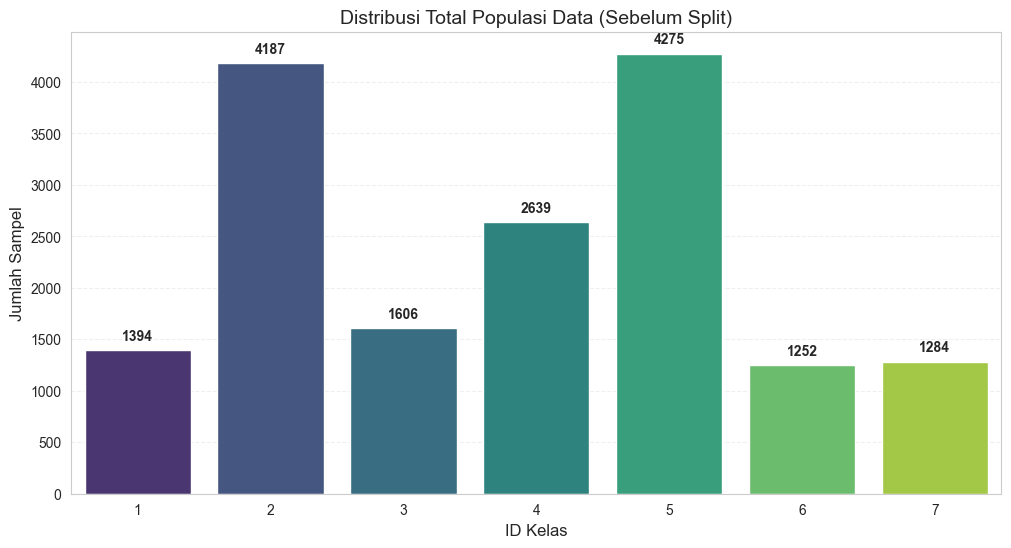


Rincian Jumlah Data per Kelas:
1    1394
2    4187
3    1606
4    2639
5    4275
6    1252
7    1284
Name: count, dtype: int64


In [ ]:
# 1. Cek Missing Values
# (Mengecek apakah ada NaN di dalam nested series)
has_nan = X_total.applymap(lambda x: np.isnan(x).any()).values.sum()
print(f"Status Missing Values: {'ADA KEBOCORAN' if has_nan > 0 else 'BERSIH (Tidak ada NaN)'}")

# 2. Visualisasi Distribusi Kelas (Imbalance Check)
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=y_total, palette="viridis")

plt.title("Distribusi Total Populasi Data (Sebelum Split)", fontsize=14)
plt.xlabel("ID Kelas", fontsize=12)
plt.ylabel("Jumlah Sampel", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Menampilkan jumlah angka di atas batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points', fontweight='bold')

plt.show()

# Tampilkan tabel jumlah
print("\nRincian Jumlah Data per Kelas:")
print(pd.Series(y_total).value_counts().sort_index())

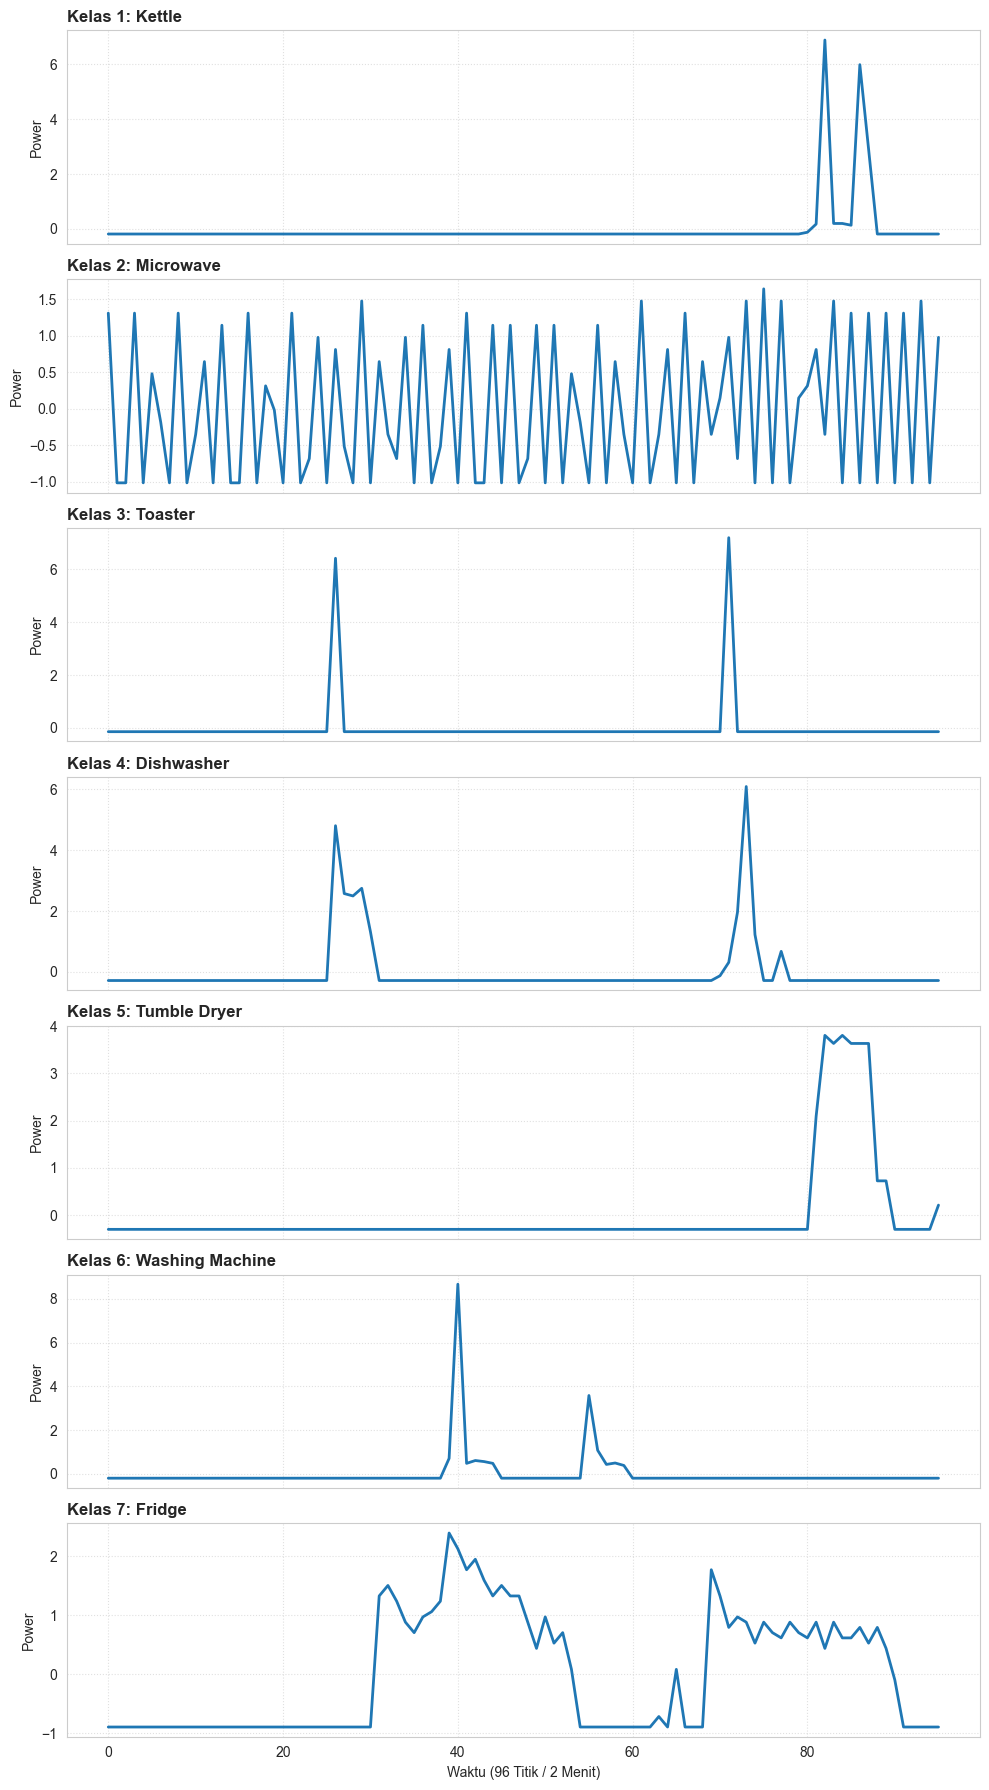

In [ ]:
class_names = {
    1: 'Kettle', 2: 'Microwave', 3: 'Toaster',
    4: 'Dishwasher', 5: 'Tumble Dryer', 
    6: 'Washing Machine', 7: 'Fridge'
}

# Plot 7 Grafik (Satu per Kelas)
fig, axes = plt.subplots(7, 1, figsize=(10, 18), sharex=True)

for i, class_id in enumerate(range(1, 8)):
    # Ambil sampel pertama yang ditemukan untuk kelas ini
    idx = np.where(y_total == class_id)[0][0]
    series_data = X_total.iloc[idx, 0] 

    # Plot
    axes[i].plot(series_data, color='#1f77b4', linewidth=2)
    axes[i].set_title(f"Kelas {class_id}: {class_names[class_id]}", fontweight='bold', loc='left')
    axes[i].set_ylabel("Power")
    axes[i].grid(True, linestyle=':', alpha=0.6)

plt.xlabel("Waktu (96 Titik / 2 Menit)")
plt.tight_layout()
plt.show()

## **3. Data Preprocessing (Persiapan & Pembagian Data)**

Sesuai strategi rancangan baru, kita akan membagi total dataset (16.637 sampel) menjadi tiga bagian terpisah menggunakan teknik **Stratified Shuffle Split** untuk menjaga proporsi kelas.

**Skema Pembagian:**
1.  **Tahap 1 (Isolasi Data Manual):** Memisahkan sekitar **33%** data (~5.480 sampel) untuk disimpan sebagai file CSV. Data ini **tidak akan disentuh** oleh model selama pelatihan, melainkan digunakan khusus untuk uji coba manual pada aplikasi Streamlit.
2.  **Tahap 2 (Train-Test Split):** Sisa data (~11.157 sampel) akan dibagi dengan rasio **80:20**.
    * **Data Train (80%):** ~8.926 sampel (Untuk melatih ROCKET).
    * **Data Test (20%):** ~2.231 sampel (Untuk evaluasi akurasi statistik).

In [ ]:
from sklearn.model_selection import train_test_split

print("MEMULAI PROSES PEMBAGIAN DATA (STRATIFIED)...")

# --- TAHAP 1: MEMISAHKAN DATA MANUAL (HOLDOUT) ---
# Target: ~5.480 data dari 16.637 adalah sekitar 32.9% (kita bulatkan 0.33)
# Sisa: ~11.157 data (67%)
X_sisa, X_manual, y_sisa, y_manual = train_test_split(
    X_total, y_total,
    test_size=0.33,      
    random_state=42,
    stratify=y_total
)

print(f"\n[TAHAP 1 SELESAI]")
print(f"   - Data Disimpan untuk Manual : {X_manual.shape[0]} baris")
print(f"   - Data Sisa untuk Modeling   : {X_sisa.shape[0]} baris")


# --- TAHAP 2: MEMBAGI DATA MODEL (TRAIN 80% : TEST 20%) ---
# Inputnya adalah X_sisa (11.157 data)
X_train, X_test, y_train, y_test = train_test_split(
    X_sisa, y_sisa,
    test_size=0.20, 
    random_state=42,
    stratify=y_sisa
)

print(f"\n[TAHAP 2 SELESAI]")
print(f"   - Data Latih (TRAIN) : {X_train.shape[0]} baris (Target: ~8.900)")
print(f"   - Data Uji (TEST)    : {X_test.shape[0]} baris (Target: ~2.200)")

MEMULAI PROSES PEMBAGIAN DATA (STRATIFIED)...

[TAHAP 1 SELESAI]
   - Data Disimpan untuk Manual : 5491 baris
   - Data Sisa untuk Modeling   : 11146 baris

[TAHAP 2 SELESAI]
   - Data Latih (TRAIN) : 8916 baris (Target: ~8.900)
   - Data Uji (TEST)    : 2230 baris (Target: ~2.200)

[VERIFIKASI RASIO KELAS 6 (Washing Machine)]
   - Total Mesin Cuci Asli : 1252
   - Di Data Train         : 671 (53.6%)
   - Di Data Manual        : 413 (33.0%)


In [ ]:
print("Sedang menyimpan data manual ke CSV...")

# 1. Flattening Data
X_manual_flat = np.array([series.values for series in X_manual.iloc[:, 0]])

# 2. Buat DataFrame Biasa
df_manual = pd.DataFrame(X_manual_flat)

df_manual['class_label'] = y_manual

# 4. Simpan ke File
nama_file_csv = "data_test_manual_5490.csv"
df_manual.to_csv(nama_file_csv, index=False, header=False)

print(f"FILE BERHASIL DISIMPAN: {nama_file_csv}")
print(f"   - Dimensi File: {df_manual.shape}")
print(f"   - Kolom 0-95  : Data Listrik")
print(f"   - Kolom 96    : Label Kunci Jawaban")
print("   (Silakan download file ini dari panel Files di kiri untuk dipakai di Streamlit)")

Sedang menyimpan data manual ke CSV...
FILE BERHASIL DISIMPAN: data_test_manual_5490.csv
   - Dimensi File: (5491, 97)
   - Kolom 0-95  : Data Listrik
   - Kolom 96    : Label Kunci Jawaban
   (Silakan download file ini dari panel Files di kiri untuk dipakai di Streamlit)


## **4. Modeling (Pembuatan Model)**

Fase ini adalah inti dari proses pembelajaran mesin. Kita akan melatih model menggunakan data *Training* yang telah dipisahkan (8.926 sampel) menggunakan arsitektur **ROCKET**.

**Spesifikasi Model:**
1.  **Transformasi Fitur:** Menggunakan **ROCKET** (*Random Convolutional Kernel Transform*) untuk mengubah data deret waktu mentah (96 titik) menjadi 10.000 fitur *kernel*. Fitur ini menangkap karakteristik bentuk gelombang, frekuensi, dan durasi yang krusial untuk membedakan perangkat dengan pola mirip.
2.  **Klasifikasi:** Menggunakan **Ridge Classifier** karena efisiensinya dalam menangani jumlah fitur yang sangat besar (10.000 fitur).
3.  **Strategi Balancing:** Mengaktifkan parameter `class_weight='balanced'` pada classifier. Ini memberikan penalti (bobot kesalahan) yang lebih besar jika model salah memprediksi kelas minoritas (seperti *Washing Machine*), sehingga model dipaksa untuk memprioritaskan akurasi pada kelas tersebut tanpa perlu *oversampling* fisik.

In [9]:
# ==========================================
# 4.1 TRAINING MODEL (ROCKET + RIDGE)
# ==========================================
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeClassifierCV
from sktime.transformations.panel.rocket import Rocket
import time

print("🚀 MEMULAI PROSES TRAINING MODEL...")
print(f"   - Data Latih yang digunakan : {X_train.shape[0]} baris")
print("   - Estimasi waktu            : 2-5 Menit (Mohon tunggu...)")

start_time = time.time()

# 1. Definisikan Pipeline
# Rocket: 10.000 kernel (standar untuk akurasi tinggi)
# RidgeClassifier: class_weight='balanced' adalah SOLUSI IMBALANCE kita
rocket_pipeline = make_pipeline(
    Rocket(num_kernels=10000, random_state=42),
    RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), class_weight='balanced')
)

# 2. Latih Model (Fitting)
rocket_pipeline.fit(X_train, y_train)

print("-" * 50)
print("   Model ROCKET kini sudah 'pintar' dan siap dievaluasi.")

🚀 MEMULAI PROSES TRAINING MODEL...
   - Data Latih yang digunakan : 8916 baris
   - Estimasi waktu            : 2-5 Menit (Mohon tunggu...)


--------------------------------------------------
   Model ROCKET kini sudah 'pintar' dan siap dievaluasi.


## **5. Evaluation (Evaluasi Model)**

Tahap ini bertujuan untuk mengukur kinerja model secara statistik menggunakan **Data Test** (~2.231 sampel).

**Metrik Evaluasi Utama:**
1.  **Akurasi Total:** Target keberhasilan > 85%.
2.  **Recall Kelas 6 (Washing Machine):** Ini adalah metrik paling kritis. Kita ingin melihat apakah strategi `class_weight='balanced'` berhasil meningkatkan kemampuan model dalam mendeteksi Mesin Cuci (mengurangi *False Negative*).
3.  **Confusion Matrix:** Peta visual untuk memastikan tidak ada lagi kebingungan signifikan antara *Washing Machine* (Kelas 6) dan *Dishwasher* (Kelas 4).

In [10]:
# ==========================================
# 5.1 PREDIKSI & LAPORAN STATISTIK
# ==========================================
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Sedang melakukan prediksi pada Data Test ({X_test.shape[0]} sampel)...")

# 1. Lakukan Prediksi
y_pred = rocket_pipeline.predict(X_test)

# 2. Hitung Akurasi
acc = accuracy_score(y_test, y_pred)
print(f"\n>>> AKURASI ROCKET: {acc * 100:.2f}% <<<")

# 3. Laporan Detail per Kelas
target_names = [
    '1: Kettle', '2: Microwave', '3: Toaster', 
    '4: Dishwasher', '5: Dryer', '6: Washing M', '7: Fridge'
]

print("\n--- CLASSIFICATION REPORT ---")
print(classification_report(y_test, y_pred, target_names=target_names))

Sedang melakukan prediksi pada Data Test (2230 sampel)...

>>> AKURASI ROCKET: 86.28% <<<

--- CLASSIFICATION REPORT ---
               precision    recall  f1-score   support

    1: Kettle       0.82      0.90      0.86       187
 2: Microwave       0.94      0.97      0.96       561
   3: Toaster       0.76      0.86      0.80       215
4: Dishwasher       0.80      0.75      0.78       354
     5: Dryer       0.93      0.86      0.90       573
 6: Washing M       0.85      0.86      0.86       168
    7: Fridge       0.71      0.70      0.70       172

     accuracy                           0.86      2230
    macro avg       0.83      0.84      0.84      2230
 weighted avg       0.86      0.86      0.86      2230



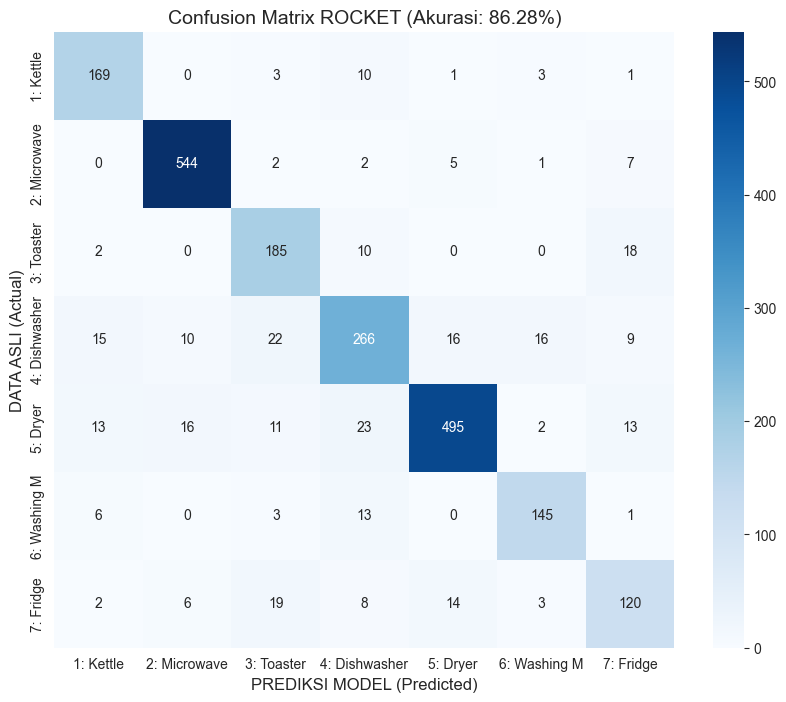

In [11]:
# ==========================================
# 5.2 VISUALISASI CONFUSION MATRIX
# ==========================================
plt.figure(figsize=(10, 8))

# Buat Matrix
cm = confusion_matrix(y_test, y_pred)

# Gambar Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)

plt.xlabel('PREDIKSI MODEL (Predicted)', fontsize=12)
plt.ylabel('DATA ASLI (Actual)', fontsize=12)
plt.title(f'Confusion Matrix ROCKET (Akurasi: {acc*100:.2f}%)', fontsize=14)
plt.show()

## **6. Deployment & Manual Testing**

Setelah model tervalidasi dengan akurasi **86.28%**, tahap terakhir adalah menyimpan model (*model export*) dan melakukan simulasi penggunaan dunia nyata.

Kita akan menggunakan **Data Manual** (~5.480 sampel) yang telah dipisahkan sejak awal (di Tahap 3.1). Data ini benar-benar *unseen* (tidak pernah disentuh saat training maupun evaluasi statistik), sehingga menjadi standar pengujian "kotak hitam" (*black-box testing*) yang paling valid.

In [12]:
# ==========================================
# 6.1 MENYIMPAN MODEL (EXPORT)
# ==========================================
import joblib
import os

# Nama file model final
filename = 'rocket_electric_model_final.pkl'

print(f"Sedang menyimpan model ke file '{filename}'...")
joblib.dump(rocket_pipeline, filename)

print(f"MODEL BERHASIL DISIMPAN: {filename}")
print(f"   Ukuran file: {os.path.getsize(filename) / 1024 / 1024:.2f} MB")
print("\n[INSTRUKSI SELANJUTNYA]")
print("Silakan download 2 file ini dari panel 'Files' di sebelah kiri:")
print("1. " + filename + " (Otak AI)")
print("2. data_test_manual_5490.csv (Data untuk tes manual)")

Sedang menyimpan model ke file 'rocket_electric_model_final.pkl'...
MODEL BERHASIL DISIMPAN: rocket_electric_model_final.pkl
   Ukuran file: 1.64 MB

[INSTRUKSI SELANJUTNYA]
Silakan download 2 file ini dari panel 'Files' di sebelah kiri:
1. rocket_electric_model_final.pkl (Otak AI)
2. data_test_manual_5490.csv (Data untuk tes manual)
